# QSO Sample Properties

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Refer to Section 3.4 of the July 2015 DESI Technical Design Report [desidoc-1125](https://desi.lbl.gov/DocDB/cgi-bin/private/ShowDocument?docid=1125):
- DESI will target and redshift 120/160 = 75% QSO / sq.deg. with z < 2.1
- DESI will target and redshift 50/68 = 74% QSO / sq.deg. with z > 2.1
- pass one targeting will identify 260 QSO / sq.deg. for an expected purity of (50 + 120)/260 = 65%

A key targeting assumption is that only true quasars will be re-observed in subsequent passes (from TDR p.65):
> From the first pass of targeting over the sky, we expect to identify 170 QSOs per deg2 from a sample of about 260
> targets per deg2, for a target selection efficiency (including redshift failures) of 67%. For the subsequent passes, 
> the target selection efficiency will be 100%, as only objects identified as z > 2.1 QSOs will be re-observed. After 
> four passes, the average target selection efficiency is therefore of 88%.

In [14]:
def luminosity_function(data, z_max=6.0, area_sq_deg=10000.):
    """Transform a data array from Nathalie into a tuple gbin, zbin, nqso.
    """
    ng, nz = data.shape
    # g-band magnitude bin centers are in the first column.
    gbin = data[:, 0]
    nz = nz - 1
    # Check that g-band bins are equally spaced.
    assert np.allclose(np.diff(gbin),  gbin[1] - gbin[0])
    # redshift bins are equally spaced from 0 up to z_max.
    zbin = z_max * (0.5 + np.arange(nz)) / nz
    # The remaining columns give predicted numbers of QSO in a 10,000 sq.deg. sample.
    # Normalize to densisities per sq.deg.
    nqso = data[:, 1:].reshape((ng, nz)) / area_sq_deg
    return gbin, zbin, nqso

## Palanque 2012 Luminosity Function

Predicted number of quasars over 10,000 sq.deg. (100% complete) vs (z,g) from Table 8 of [Palanque 2012, *Luminosity Function from dedicated SDSS-III and MMT data of quasars in 0.7 < z < 4.0 selected with a new approach*](http://arxiv.org/abs/1209.3968):

In [10]:
table2012 = np.array([
        15.75, 50, 11, 7, 4, 4, 4, 4, 4, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        16.25, 92, 34, 20, 14, 13, 13, 12, 12, 10, 8, 6, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        16.75, 159, 96, 62, 43, 42, 41, 39, 37, 31, 25, 22, 21, 12, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        17.25, 249, 248, 182, 131, 130, 128, 120, 114, 96, 77, 65, 58, 34, 16, 8, 4, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        17.75, 354, 558, 483, 381, 387, 384, 365, 347, 296, 238, 192, 158, 91, 44, 22, 11, 5, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        18.25, 461, 1076, 1125, 1009, 1066, 1074, 1050, 1008, 876, 713, 553, 431, 246, 119, 59, 29, 15, 8, 4, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        18.75, 548, 1790, 2224, 2318, 2565, 2671, 2715, 2642, 2374, 1982, 1528, 1126, 650, 318, 161, 80, 40, 20, 10, 5, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        19.25, 582, 2624, 3751, 4464, 5166, 5601, 5928, 5899, 5550, 4825, 3775, 2744, 1626, 832, 428, 216, 108, 56, 28, 14, 7, 4, 2, 1, 0, 0, 0, 0, 0, 0,
        19.75, 503, 3517, 5561, 7237, 8674, 9779, 10631, 10847, 10630, 9685, 7904, 5822, 3695, 2047, 1103, 569, 292, 151, 75, 39, 20, 10, 5, 3, 1, 1, 0, 0, 0, 0,
        20.25, 198, 4473, 7528, 10277, 12641, 14591, 16079, 16737, 16843, 15972, 13518, 10254, 7186, 4500, 2627, 1445, 760, 405, 203, 106, 54, 27, 14, 7, 4, 2, 1, 0, 0, 0,
        20.75, 0, 4976, 9650, 13461, 16826, 19623, 21758, 22913, 23360, 22704, 19534, 14971, 11576, 8356, 5491, 3330, 1886, 1035, 540, 286, 145, 75, 39, 19, 10, 5, 3, 1, 1, 0,
        21.25, 0, 4569, 12028, 16929, 21338, 24976, 27767, 29400, 30142, 29653, 25414, 19052, 15753, 12809, 9602, 6619, 4164, 2484, 1363, 744, 391, 201, 105, 53, 28, 14, 7, 4, 2, 1,
        21.75, 0, 2676, 14806, 20913, 26454, 31008, 34512, 36621, 37628, 37214, 31417, 22460, 19085, 16765, 13967, 10897, 7823, 5190, 3161, 1833, 999, 532, 285, 142, 75, 38, 19, 10, 5, 2,
        22.25, 0, 84, 15784, 25646, 32491, 38098, 42423, 45057, 46339, 45926, 38025, 25572, 21704, 19852, 17646, 15057, 12150, 9109, 6291, 4023, 2400, 1338, 736, 381, 203, 102, 52, 27, 13, 7,
        22.75, 0, 0, 9053, 31359, 39749, 46622, 51924, 55165, 56750, 56291, 45702, 28725, 23970, 22325, 20498, 18418, 16044, 13305, 10392, 7496, 5006, 3077, 1810, 975, 530, 276, 141, 73, 36, 19,
        23.25, 0, 0, 232, 29955, 48563, 56956, 63439, 67410, 69360, 68823, 54820, 32149, 26141, 24537, 22848, 21047, 19095, 16860, 14383, 11591, 8748, 6068, 3930, 2330, 1333, 714, 373, 198, 98, 51,
        23.75, 0, 0, 0, 6251, 54772, 69546, 77462, 82312, 84692, 84046, 65808, 35985, 28366, 26707, 25016, 23292, 21523, 19635, 17592, 15282, 12711, 9950, 7240, 4836, 3014, 1753, 959, 519, 260, 137,
        24.25, 0, 0, 0, 0, 15743, 79815, 94554, 100480, 103394, 102610, 79067, 40365, 30717, 28956, 27187, 25426, 23677, 21910, 20107, 18177, 16049, 13701, 11073, 8398, 5869, 3795, 2254, 1299, 682, 364,
        24.75, 0, 0, 0, 0, 0, 18500, 100062, 122644, 126193, 125238, 95158, 45393, 33235, 31346, 29458, 27598, 25781, 24001, 22249, 20487, 18656, 16705, 14505, 12119, 9500, 6953, 4650, 2915, 1656, 927,
        25.25, 0, 0, 0, 0, 0, 0, 8489, 90591, 153382, 152869, 114645, 51218, 35949, 33912, 31882, 29890, 27956, 26090, 24287, 22535, 20802, 19060, 17206, 15222, 12983, 10546, 7997, 5625, 3605, 2163,
        25.75, 0, 0, 0, 0, 0, 0, 0, 0, 38955, 134619, 138257, 57968, 38880, 36680, 34488, 32343, 30266, 28272, 26363, 24538, 22780, 21075, 19370, 17641, 15781, 13728, 11472, 9007, 6581, 4416,
        26.25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 28228, 37600, 40111, 39669, 37301, 34985, 32744, 30600, 28552, 26608, 24759, 22997, 21298, 19641, 17974, 16232, 14366, 12237, 9959, 7525
    ]).reshape(22, 31)

## Palanque 2015 Luminosity Function

Tabulate the predicted surface densities for the two different methods in [Palanque 2015, "The Extended Baryon Oscillation Spectroscopic Survey: Variability Selection and Quasar Luminosity Function"](http://arxiv.org/abs/1509.05607):

In [8]:
table2015a = np.array([
    15.75, 30, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    16.25, 60, 8, 4, 5, 5, 4, 4, 4, 4, 3, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    16.75, 117, 29, 17, 19, 18, 17, 16, 16, 15, 12, 8, 6, 3, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    17.25, 216, 101, 62, 70, 69, 64, 61, 62, 59, 45, 32, 22, 13, 7, 4, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    17.75, 358, 312, 224, 255, 253, 235, 227, 231, 224, 171, 121, 82, 47, 25, 13, 7, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    18.25, 525, 788, 722, 855, 869, 819, 803, 824, 811, 630, 452, 309, 171, 88, 46, 22, 9, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    18.75, 703, 1563, 1890, 2393, 2544, 2493, 2507, 2612, 2622, 2112, 1572, 1096, 603, 309, 157, 76, 28, 8, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    19.25, 898, 2490, 3740, 5086, 5758, 5971, 6214, 6580, 6745, 5779, 4613, 3369, 1913, 1004, 516, 249, 93, 26, 10, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    19.75, 1125, 3445, 5827, 8319, 9913, 10805, 11590, 12422, 12937, 11839, 10261, 8011, 4902, 2771, 1499, 753, 289, 78, 31, 12, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0,
    20.25, 1399, 4456, 7930, 11585, 14183, 15895, 17350, 18718, 19660, 18783, 17275, 14270, 9517, 5936, 3513, 1919, 804, 228, 91, 34, 10, 2, 1, 0, 0, 0, 0, 0, 0, 0,
    20.75, 1734, 5616, 10195, 15029, 18589, 21065, 23176, 25094, 26479, 25795, 24410, 20801, 14695, 9899, 6391, 3856, 1851, 599, 248, 94, 27, 6, 1, 1, 0, 0, 0, 0, 0, 0,
    21.25, 2141, 7016, 12842, 18997, 23563, 26793, 29584, 32124, 34027, 33395, 31948, 27600, 20026, 14047, 9572, 6217, 3399, 1325, 598, 241, 73, 17, 4, 1, 1, 1, 0, 0, 0, 0,
    21.75, 2631, 8738, 16067, 23807, 29528, 33591, 37170, 40481, 43047, 42378, 40701, 35383, 25928, 18498, 12931, 8731, 5198, 2395, 1211, 541, 182, 45, 10, 3, 2, 2, 1, 1, 0, 0,
    22.25, 3211, 10871, 20058, 29754, 36864, 41912, 46457, 50760, 54210, 53457, 51424, 44870, 32982, 23683, 16738, 11500, 7140, 3651, 2036, 1022, 394, 110, 25, 8, 6, 4, 2, 2, 1, 1,
    22.75, 3875, 13520, 25026, 37157, 45968, 52212, 57971, 63564, 68202, 67344, 64840, 56742, 41732, 30041, 21339, 14774, 9334, 5003, 2969, 1636, 730, 239, 60, 21, 13, 8, 5, 3, 2, 1,
    23.25, 4591, 16812, 31220, 46395, 57302, 65011, 72306, 79586, 85821, 84853, 81750, 71739, 52744, 38010, 27078, 18823, 11969, 6500, 3980, 2322, 1159, 450, 133, 48, 30, 19, 12, 7, 5, 3,
    23.75, 5270, 20905, 38950, 57934, 71426, 80937, 90180, 99667, 108052, 106983, 103130, 90753, 66677, 48080, 34331, 23929, 15247, 8253, 5120, 3076, 1645, 733, 256, 102, 63, 39, 24, 15, 9, 6,
    24.25, 5713, 25993, 48598, 72353, 89037, 100762, 112480, 124858, 136130, 134989, 130200, 114903, 84351, 60850, 43543, 30420, 19392, 10379, 6468, 3939, 2184, 1061, 432, 192, 119, 73, 45, 27, 17, 10,
    24.75, 5464, 32318, 60643, 90374, 110997, 125444, 140309, 156474, 171625, 170467, 164509, 145614, 106798, 77072, 55275, 38702, 24667, 13006, 8110, 4969, 2803, 1428, 648, 317, 199, 123, 76, 46, 28, 17
    ]).reshape(19, 31)

In [6]:
table2015b = np.array([
    15.75, 23, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ,
    16.25, 49, 4, 2, 2, 2, 2, 2, 2, 2, 1, 1, 16, 10, 5, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ,
    16.75, 99, 16, 8, 10, 10, 9, 9, 8, 8, 5, 3, 40, 25, 12, 6, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ,
    17.25, 190, 69, 38, 44, 45, 41, 39, 39, 36, 24, 15, 104, 65, 32, 15, 7, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    17.75, 326, 248, 165, 196, 199, 185, 177, 176, 163, 113, 69, 268, 167, 82, 39, 17, 6, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ,
    18.25, 488, 699, 628, 775, 805, 763, 744, 751, 709, 501, 314, 679, 422, 211, 102, 46, 16, 5, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ,
    18.75, 664, 1453, 1808, 2389, 2615, 2602, 2624, 2702, 2629, 1968, 1308, 1650, 1027, 532, 262, 119, 42, 12, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ,
    19.25, 866, 2337, 3638, 5131, 5991, 6356, 6674, 7031, 7076, 5840, 4349, 3696, 2334, 1283, 657, 307, 111, 30, 11, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0 ,
    19.75, 1113, 3252, 5609, 8203, 9995, 11093, 11997, 12825, 13218, 11932, 10033, 7168, 4740, 2850, 1566, 769, 288, 77, 27, 9, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0 ,
    20.25, 1423, 4274, 7646, 11336, 14053, 15897, 17425, 18758, 19553, 18488, 16711, 11689, 8346, 5597, 3399, 1817, 723, 195, 70, 23, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0 ,
    20.75, 1814, 5517, 9994, 14889, 18542, 21093, 23243, 25116, 26334, 25315, 23523, 16660, 12773, 9487, 6456, 3873, 1709, 482, 177, 58, 15, 3, 1, 0, 0, 0, 0, 0, 0, 0 ,
    21.25, 2303, 7084, 12906, 19262, 23994, 27320, 30181, 32721, 34466, 33311, 31222, 21941, 17567, 14054, 10566, 7166, 3647, 1143, 436, 148, 38, 7, 1, 0, 0, 0, 0, 0, 0, 0 ,
    21.75, 2911, 9082, 16610, 24818, 30879, 35139, 38892, 42310, 44774, 43370, 40764, 27761, 22625, 18918, 15230, 11423, 6772, 2503, 1034, 367, 96, 19, 3, 1, 0, 0, 0, 0, 0, 0 ,
    22.25, 3652, 11639, 21358, 31945, 39682, 45108, 50015, 54614, 58082, 56344, 53020, 34486, 28144, 24081, 20162, 16146, 10868, 4879, 2277, 876, 241, 49, 9, 2, 1, 1, 0, 0, 0, 0 ,
    22.75, 4527, 14913, 27461, 41112, 50977, 57875, 64289, 70486, 75363, 73207, 68942, 42521, 34433, 29793, 25456, 21136, 15480, 8290, 4489, 1955, 585, 122, 22, 5, 3, 1, 1, 0, 0, 0 ,
    23.25, 5504, 19106, 35311, 52915, 65485, 74247, 82634, 90995, 97849, 95188, 89701, 52304, 41818, 36375, 31400, 26555, 20387, 12378, 7728, 3931, 1345, 302, 55, 14, 7, 3, 2, 1, 0, 0,
    23.75, 6479, 24477, 45409, 68119, 84128, 95249, 106225, 117520, 127141, 123880, 116812, 64335, 50637, 44159, 38330, 32717, 25709, 16775, 11668, 6924, 2830, 719, 137, 35, 18, 9, 4, 2, 1, 0 ,
    24.25, 7195, 31358, 58404, 87705, 108088, 122196, 136567, 151843, 165336, 161372, 152261, 79215, 61261, 53494, 46590, 39969, 31740, 21404, 15927, 10682, 5278, 1609, 337, 89, 45, 22, 11, 5, 3, 1,
    24.75, 7043, 40171, 75127, 112945, 138885, 156770, 175600, 196278, 215178, 210413, 198658, 97685, 74113, 64767, 56549, 48670, 38821, 26430, 20396, 14815, 8615, 3269, 793, 220, 112, 56, 28, 13, 6, 3
    ]).reshape(19, 31)

## Marginal Distributions

In [111]:
def bin_index(bin_centers, low_edge):
    """Find the index of the bin with the specified low edge, where bins is an array of equally-spaced bin centers.
    """
    delta = bin_centers[1] - bin_centers[0]
    min_value = bin_centers[0] - 0.5 * delta
    index = int(round((low_edge - min_value) / delta))
    if abs((low_edge - min_value) / delta - index) > 1e-5:
        raise ValueError('low_edge = {} is not aligned with specified bins.'.format(low_edge))
    return index

In [101]:
def marginal_g(data, z_min=0.):
    """Tabulate the marginal distribution of QSOs per sq.deg. per g-band magnitude bin with z > z_min.
    """
    gbin, zbin, nqso = luminosity_function(data)
    cut_index = bin_index(zbin, z_min)
    return gbin, np.sum(nqso[:, cut_index:], axis=1)

In [102]:
def marginal_z(data, g_max):
    """Tabulate the marginal distribution of QSOs per sq.deg. per redshift bin with g < g_max.
    """
    gbin, zbin, nqso = luminosity_function(data)
    cut_index = bin_index(gbin, g_max)
    return zbin, np.sum(nqso[:cut_index], axis=0)

## Plots

Reproduce curves from Figure 3.14 of the TDR:

In [92]:
def tdr_figure_314(save=None):
    # Plot 2012 results.
    g, ng1_2012 = marginal_g(table2012, z_min=1.0)
    g, ng2_2012 = marginal_g(table2012, z_min=2.0)
    plt.plot(g, np.cumsum(ng1_2012), 'r--', label='z > 1')
    plt.plot(g, np.cumsum(ng2_2012), 'b--', label='z > 2')
    # Superimpose 2015 results.
    g, ng1_2015a = marginal_g(table2015a, z_min=1.0)
    g, ng1_2015b = marginal_g(table2015b, z_min=1.0)
    plt.plot(g, np.cumsum(ng1_2015a), 'r', label='(2015)')
    plt.plot(g, np.cumsum(ng1_2015b), 'r')
    g, ng2_2015a = marginal_g(table2015a, z_min=2.0)
    g, ng2_2015b = marginal_g(table2015b, z_min=2.0)
    plt.plot(g, np.cumsum(ng2_2015a), 'b', label='(2015)')
    plt.plot(g, np.cumsum(ng2_2015b), 'b')
    #
    plt.xlim(18, 23.5)
    plt.ylim(0, 250)
    plt.axvline(22, color='k')
    plt.axvline(23, color='k')
    plt.legend(loc='upper left')
    plt.xlabel('g-band Magnitude (ext. corr.)')
    plt.ylabel('N(z) / sq.deg. / $(\Delta g = 0.5)$')
    plt.grid()
    plt.tight_layout()
    if save:
        plt.savefig(save)
    plt.show()

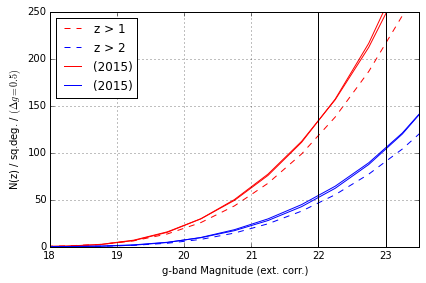

In [112]:
tdr_figure_314('tdr314.png')

Reproduce curves from Figure 3.17 of the TDR:

In [90]:
def tdr_fig_317(save=None):
    # Plot 2012 results.
    z, nz23_2012 = marginal_z(table2012, g_max=23)
    z, nz22_2012 = marginal_z(table2012, g_max=22)
    plt.plot(z, nz23_2012, 'r--', label='g < 23.0')
    plt.plot(z, nz22_2012, 'b--', label='g < 22.0')
    # Superimpose 2015 results.
    z, nz23_2015a = marginal_z(table2015a, g_max=23)
    z, nz23_2015b = marginal_z(table2015b, g_max=23)
    plt.fill_between(z, nz23_2015a, nz23_2015b, color='r', alpha=0.25, lw=0)
    plt.plot(z, nz23_2015a, 'r', label='(2015)')
    plt.plot(z, nz23_2015b, 'r') 
    z, nz22_2015a = marginal_z(table2015a, g_max=22)
    z, nz22_2015b = marginal_z(table2015b, g_max=22)
    plt.fill_between(z, nz22_2015a, nz22_2015b, color='b', alpha=0.25, lw=0)
    plt.plot(z, nz22_2015a, 'b', label='(2015)')
    plt.plot(z, nz22_2015b, 'b') 
    #
    plt.axvline(2.1, color='k')
    plt.legend(loc='upper right')
    plt.xlabel('QSO redshift')
    plt.ylabel('N(z) / sq.deg. / $(\Delta z = 0.1)$')
    plt.xlim(0., 5.2)
    plt.grid()
    plt.tight_layout()
    if save:
        plt.savefig(save)
    plt.show()

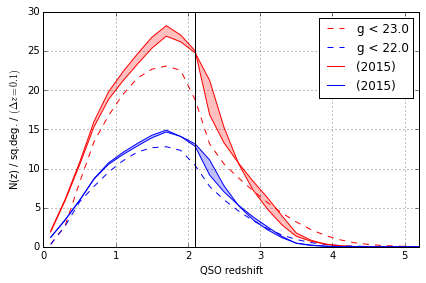

In [113]:
tdr_fig_317('tdr317.png')

Plot the luminosity function versus redshift and extinction-corrected g-band magnitude:

In [114]:
def lumi_plot(data, z_min=0, z_max=6, g_min=19, g_max=23, save=None):
    gbin, zbin, nqso = luminosity_function(data)
    z_min_cut = bin_index(zbin, z_min)
    z_max_cut = bin_index(zbin, z_max)
    g_min_cut = bin_index(gbin, g_min)
    g_max_cut = bin_index(gbin, g_max)
    #
    plt.figure(figsize=(8,4))
    plt.imshow(nqso[g_min_cut:g_max_cut, z_min_cut:z_max_cut],
               origin='lower', interpolation='None', aspect=0.85, cmap='PuRd',
               extent=(z_min, z_max, g_min, g_max))
    plt.xlabel('QSO redshift')
    plt.ylabel('g-band magnitude (ext. corr.)')
    plt.colorbar().set_label('N(z) / sq.deg. / $(\Delta z = {:.1f})$'.format(gbin[1]-gbin[0]))
    plt.tight_layout()
    plt.grid()
    plt.tight_layout()
    if save:
        plt.savefig(save)
    plt.show()

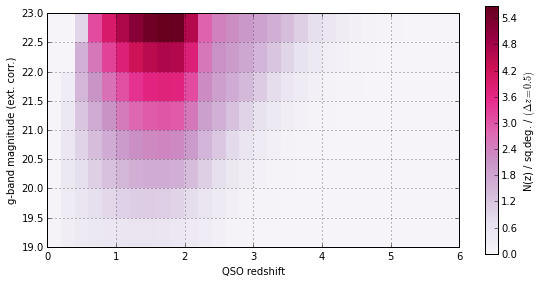

In [118]:
lumi_plot(table2012, save='lumi2012.png')

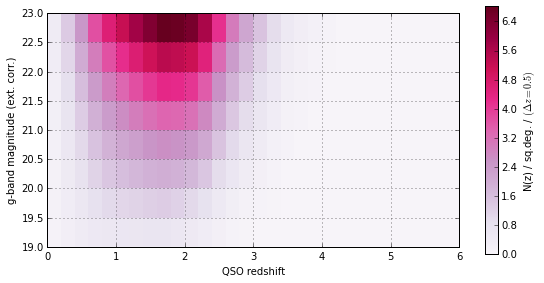

In [117]:
lumi_plot(table2015a, save='lumi2015.png')